## read dataset

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("pd_speech_features.csv")
data

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,250,0,0.80903,0.56355,0.28385,417,416,0.004627,0.000052,0.00064,...,3.0706,3.0190,3.1212,2.4921,3.5844,3.5400,3.3805,3.2003,6.8671,0
752,250,0,0.16084,0.56499,0.59194,415,413,0.004550,0.000220,0.00143,...,1.9704,1.7451,1.8277,2.4976,5.2981,4.2616,6.3042,10.9058,28.4170,0
753,251,0,0.88389,0.72335,0.46815,381,380,0.005069,0.000103,0.00076,...,51.5607,44.4641,26.1586,6.3076,2.8601,2.5361,3.5377,3.3545,5.0424,0
754,251,0,0.83782,0.74890,0.49823,340,339,0.005679,0.000055,0.00092,...,19.1607,12.8312,8.9434,2.2044,1.9496,1.9664,2.6801,2.8332,3.7131,0


# 1. Preprocessing

## over sampling

In [3]:
from imblearn.over_sampling import SMOTE

In [4]:
X=data[data.columns[0:754]]
Y=data[data.columns[754]]

In [5]:
smote = SMOTE(random_state=42)
X_sm, y_sm = smote.fit_sample(X, Y)

## strandardize dataset

In [6]:
from sklearn.preprocessing import StandardScaler
x_ = X_sm.values
y_ = y_sm.values
transformed_x = StandardScaler().fit_transform(x_)

# Feature reduction (PCA with whitening)

In [7]:
from sklearn.decomposition import PCA
pca = PCA()
x_pca = pca.fit_transform(transformed_x)
x_pca = pd.DataFrame(x_pca)
x_pca.head()

,0,1,2,3,4,5,6,7,8,9,...,744,745,746,747,748,749,750,751,752,753
0,11.702728,0.247088,-7.899833,-1.112266,-2.403179,1.302891,3.095172,-0.044674,0.706290,-0.287674,...,1.790831e-07,1.690410e-08,4.054743e-07,-7.521848e-07,-1.692523e-07,4.359151e-07,-1.563951e-08,-6.688584e-08,-2.968357e-09,1.392918e-09
1,12.447137,0.252015,-7.920687,1.299166,-2.335748,3.183127,3.053338,1.418788,0.666905,-1.769180,...,-1.044289e-06,-9.941415e-07,-1.254308e-06,1.401347e-07,-3.166124e-07,-1.891234e-07,1.211786e-07,2.575249e-08,-1.325654e-08,-2.930224e-10
2,14.959839,-3.013946,-8.361064,1.520660,-1.452460,3.665187,1.123319,0.977428,0.299898,1.455366,...,2.206109e-06,-3.238438e-08,-5.763995e-09,1.215997e-06,1.472409e-07,4.745943e-07,-1.774003e-07,-4.614407e-08,-7.824639e-09,-3.028993e-09
3,13.393720,3.686267,16.089193,-4.721832,-7.269056,-10.507969,-3.526951,-6.247000,-3.379893,-8.244876,...,-2.981007e-09,7.897078e-09,6.753468e-09,3.253248e-09,-4.953184e-09,-7.700894e-09,-5.474034e-09,5.373259e-10,-2.011228e-10,-1.079247e-10
4,10.830716,-0.209524,16.230417,-6.230668,-7.402800,-11.847659,-1.726220,-7.672991,-6.231476,-10.103650,...,4.160266e-08,-3.122199e-08,-2.015595e-09,-1.916613e-08,3.516876e-09,7.887753e-09,5.841173e-09,4.115844e-11,3.117622e-10,5.032707e-11


In [8]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([1.36699637e-01, 8.85627780e-02, 8.11211456e-02, 4.44694536e-02,
       3.57708956e-02, 3.10611026e-02, 2.63034055e-02, 2.26330543e-02,
       2.07414599e-02, 1.83079355e-02, 1.70024899e-02, 1.52747658e-02,
       1.34838160e-02, 1.29963128e-02, 1.21084561e-02, 1.13963256e-02,
       1.04736240e-02, 1.02404043e-02, 1.01045986e-02, 9.63098836e-03,
       9.33301243e-03, 8.32208826e-03, 7.86521421e-03, 7.38605253e-03,
       7.03988390e-03, 6.64644346e-03, 6.38917102e-03, 6.03551750e-03,
       5.90199516e-03, 5.75277823e-03, 5.56207293e-03, 5.30168574e-03,
       5.20677706e-03, 5.05478573e-03, 4.81140265e-03, 4.70588939e-03,
       4.48345270e-03, 4.36164167e-03, 4.19907168e-03, 4.11941622e-03,
       3.97566893e-03, 3.80256158e-03, 3.68771806e-03, 3.62022690e-03,
       3.55625254e-03, 3.45470807e-03, 3.40046725e-03, 3.33343354e-03,
       3.28811171e-03, 3.18141747e-03, 3.09082297e-03, 2.99054411e-03,
       2.96800251e-03, 2.94085906e-03, 2.88191447e-03, 2.78964963e-03,
      

In [9]:
components = 0
cummulitive = 0
for i in range(len(pca.explained_variance_ratio_)):
    cummulitive += pca.explained_variance_ratio_[i]
    components += 1
    if cummulitive>0.9:
        break


In [10]:
components

109

In [11]:
final_X = PCA(n_components=components,svd_solver = 'full',whiten=True).fit_transform(transformed_x)

In [12]:
final_X.shape

(1128, 109)

# 2. classification

# generative models
### gmm is best model in generative methods due to model accuracy

### some functions that we use in our classifying process
#### to split data of each class for training

In [13]:
def split_class(x_train, y_train):
    X0 = []
    X1 = []
    for i in range(len(y_train)):
        if y_train[i] == 0:
            X0.append(x_train[i])
        else:
            X1.append(x_train[i])
    return X0,X1


#### for predicting test data labels

In [14]:
def get_score_give_labels(gmm0, gmm1, x_test):
    labels = []
    for i in x_test:
        score0 = gmm0.score([i])
        score1 = gmm1.score([i])
        if score0 >= score1:
            label = 0
        else:
            label =1
        labels.append(label)
    return labels


#### for computing accuracy

In [15]:
def get_accuracy(y_test, lables):
    acc = 0
    for i in range(len(y_test)):
        if y_test[i] == lables[i]:
            acc +=1
    return acc/len(y_test)

## parzen density estimation 

In [16]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KernelDensity

#final_X = final_X.to_numpy()
y = y_sm.to_numpy()
skf = StratifiedKFold(n_splits=5, random_state=43)
skf.get_n_splits(final_X, y)

all_acuracy = {}
cc=0
cross_accuarcy = []
for train_index, test_index in skf.split(final_X, y):
            
    X_train, X_test = final_X[train_index], final_X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    #print(y_train)
    X0,X1 = split_class(X_train, y_train)
    kde0 = KernelDensity(bandwidth=0.04,kernel='gaussian', algorithm='ball_tree').fit(X0)
    kde1 = KernelDensity(bandwidth=0.04,kernel='gaussian', algorithm='ball_tree').fit(X1)
    labels = get_score_give_labels(kde0, kde1, X_test)
    accuarcy = get_accuracy(y_test,labels)
    cross_accuarcy.append(accuarcy)
        
print(cc,cross_accuarcy)
mean_acc = np.mean(cross_accuarcy)





0 [0.8893805309734514, 0.9070796460176991, 0.9292035398230089, 0.8933333333333333, 0.8844444444444445]


In [17]:
print("Our accuracy is: %.2f%% +- %.2f%%" %(np.mean(cross_accuarcy)*100,np.std(cross_accuarcy)*100))

Our accuracy is: 90.07% +- 1.61%


## KNN

In [18]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier

#final_X = final_X.to_numpy()
y = y_sm.to_numpy()
skf = StratifiedKFold(n_splits=5, random_state=43)
skf.get_n_splits(final_X, y)

all_acuracy = {}
cc=0
for i in range(1,11):
        
    cross_accuarcy = []
    for train_index, test_index in skf.split(final_X, y):
            
        X_train, X_test = final_X[train_index], final_X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        #print(y_train)
        X0,X1 = split_class(X_train, y_train)
        classifier = KNeighborsClassifier(n_neighbors=i)
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)
        accuarcy = get_accuracy(y_test,y_pred)
        cross_accuarcy.append(accuarcy)
        
    print(cc,cross_accuarcy)
    mean_acc = np.mean(cross_accuarcy)
    all_acuracy[cc] = {'acc':mean_acc, "k" :i}
    cc +=1



0 [0.9026548672566371, 0.9247787610619469, 0.9424778761061947, 0.9066666666666666, 0.88]
1 [0.8141592920353983, 0.8672566371681416, 0.8805309734513275, 0.8311111111111111, 0.8266666666666667]
2 [0.8407079646017699, 0.8982300884955752, 0.911504424778761, 0.8888888888888888, 0.8533333333333334]
3 [0.7964601769911505, 0.8628318584070797, 0.8716814159292036, 0.8488888888888889, 0.84]
4 [0.831858407079646, 0.8849557522123894, 0.9070796460176991, 0.8977777777777778, 0.84]
5 [0.8008849557522124, 0.8407079646017699, 0.8849557522123894, 0.8622222222222222, 0.8355555555555556]
6 [0.8451327433628318, 0.8539823008849557, 0.911504424778761, 0.8888888888888888, 0.8222222222222222]
7 [0.8141592920353983, 0.831858407079646, 0.8938053097345132, 0.8444444444444444, 0.8177777777777778]
8 [0.8141592920353983, 0.8407079646017699, 0.9026548672566371, 0.8533333333333334, 0.8222222222222222]
9 [0.7743362831858407, 0.8230088495575221, 0.8938053097345132, 0.8266666666666667, 0.8311111111111111]


In [19]:
list_of_accs = []
for i in range(len(all_acuracy)):
    list_of_accs.append(all_acuracy[i]['acc'])

list_of_accs

[0.9113156342182892,
 0.843944936086529,
 0.8785329400196658,
 0.8439724680432645,
 0.8723343166175024,
 0.8448652900688298,
 0.8643461160275319,
 0.8404090462143559,
 0.8466155358898723,
 0.8297856440511306]

In [20]:
best_case = np.argmax(list_of_accs)
print(all_acuracy[best_case])
print('accuracy of this case = ',all_acuracy[best_case]['acc'])

{'acc': 0.9113156342182892, 'k': 1}
accuracy of this case =  0.9113156342182892


## GMM

In [21]:
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn import datasets,mixture,cluster

#final_X = final_X.to_numpy()
y = y_sm.to_numpy()
skf = StratifiedKFold(n_splits=5, random_state=43)
skf.get_n_splits(final_X, y)

all_acuracy = {}
cc=0
for i in range(1,6):
    for j in range(1,6):
        
        cross_accuarcy = []
        for train_index, test_index in skf.split(final_X, y):
            
            X_train, X_test = final_X[train_index], final_X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            #print(y_train)
            X0,X1 = split_class(X_train, y_train)
            gmm0 = mixture.GaussianMixture(n_components=i, covariance_type='full').fit(X0)
            gmm1 = mixture.GaussianMixture(n_components=j, covariance_type='full').fit(X1)
            labels = get_score_give_labels(gmm0, gmm1, X_test)
            accuarcy = get_accuracy(y_test,labels)
            cross_accuarcy.append(accuarcy)
        
        print(cc,cross_accuarcy)
        mean_acc = np.mean(cross_accuarcy)
        all_acuracy[cc] = {'acc':mean_acc, "class_1_component" :i ,"class_2_component" :j}
        cc +=1



0 [0.8716814159292036, 0.8982300884955752, 0.9823008849557522, 0.9822222222222222, 0.9422222222222222]
1 [0.8849557522123894, 0.9026548672566371, 0.9513274336283186, 0.9822222222222222, 0.9288888888888889]
2 [0.8982300884955752, 0.9070796460176991, 0.9734513274336283, 0.9644444444444444, 0.9422222222222222]
3 [0.8893805309734514, 0.8982300884955752, 0.9823008849557522, 0.9022222222222223, 0.8755555555555555]
4 [0.9026548672566371, 0.8893805309734514, 0.9336283185840708, 0.8977777777777778, 0.8666666666666667]
5 [0.8716814159292036, 0.8938053097345132, 0.9778761061946902, 0.96, 0.9466666666666667]
6 [0.8407079646017699, 0.8805309734513275, 0.9778761061946902, 0.96, 0.9155555555555556]
7 [0.8716814159292036, 0.9203539823008849, 0.9380530973451328, 0.9688888888888889, 0.92]
8 [0.8893805309734514, 0.9203539823008849, 0.9646017699115044, 0.9466666666666667, 0.8977777777777778]
9 [0.8938053097345132, 0.915929203539823, 0.9557522123893806, 0.9688888888888889, 0.9422222222222222]
10 [0.8318584

In [22]:
list_of_accs = []
for i in range(len(all_acuracy)):
    list_of_accs.append(all_acuracy[i]['acc'])

list_of_accs

[0.9353313667649952,
 0.9300098328416911,
 0.9370855457227139,
 0.9095378564405113,
 0.8980216322517208,
 0.9300058997050147,
 0.9149341199606686,
 0.923795476892822,
 0.9237561455260572,
 0.9353195673549657,
 0.9034021632251721,
 0.9051445427728613,
 0.8981396263520157,
 0.9122674532940019,
 0.9193431661750247,
 0.903347099311701,
 0.8936715830875123,
 0.8696951819075712,
 0.915819075712881,
 0.9344188790560473,
 0.8751150442477875,
 0.9087354965585053,
 0.8608338249754178,
 0.9105250737463126,
 0.9158033431661752]

In [23]:
best_case = np.argmax(list_of_accs)
print(all_acuracy[best_case])
print('accuracy of this case = ',all_acuracy[best_case]['acc'])

{'acc': 0.9370855457227139, 'class_1_component': 1, 'class_2_component': 3}
accuracy of this case =  0.9370855457227139


Text(0, 0.5, 'accuracy')

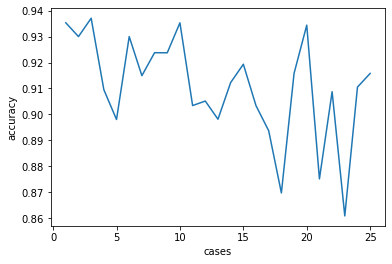

In [24]:
import matplotlib.pyplot as plt
plt.plot(range(1,26),list_of_accs)
plt.xlabel('cases')
plt.ylabel('accuracy')

## other metrics for best generative classifier

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train, X_test, y_train, y_test = train_test_split(final_X, y_sm.to_numpy(), test_size=0.25, random_state=42)

X0,X1 = split_class(X_train, y_train)
gmm0 = mixture.GaussianMixture(n_components=1, covariance_type='full').fit(X0)
gmm1 = mixture.GaussianMixture(n_components=2, covariance_type='full').fit(X1)
labels = get_score_give_labels(gmm0, gmm1, X_test)

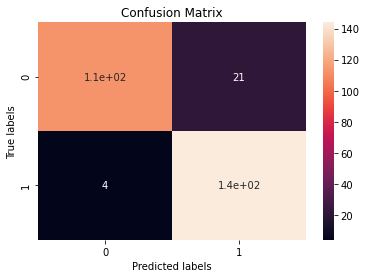

In [26]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_test, labels, [0,1])
ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 


# Discriminative models

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(final_X, y_sm.to_numpy(), test_size=0.25, random_state=42)

### we use train data for traning and cross validation and parameter tuning and test data for testing

##  LogisticRegression

In [40]:
# tune parameters
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
clf =LogisticRegression(random_state = 42 ) 
clf_poly = GridSearchCV(clf,param_grid={'penalty':['l1', 'l2', 'elasticnet', 'none'],'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga']},return_train_score='False',cv=5)
clf_poly.fit(X_train, y_train)
print('best parameters of the model are:',clf_poly.best_params_)

best parameters of the model are: {'penalty': 'l2', 'solver': 'liblinear'}


In [41]:
clf_logistic =LogisticRegression(random_state = 42 , penalty = 'l2', solver='liblinear').fit(X_train,y_train) 
labels = clf_logistic.predict(X_test)
#accuracy_score(y_test, labels)
print("Our accuracy is: %.2f%% " %(accuracy_score(y_test, labels)*100))

Our accuracy is: 87.23% 


## SVM

In [42]:
# tune parameters
from sklearn.model_selection import GridSearchCV
from sklearn import svm
clf =svm.SVC()
clf_poly = GridSearchCV(clf,param_grid={'kernel':['linear', 'poly', 'sigmoid'],'decision_function_shape':['ovo', 'ovr'], 'C':[1,5,10,20],'degree':[1,2,3,4,5,6]},return_train_score='False',cv = 5)
clf_poly.fit(X_train, y_train)
print('best parameters of the model are:',clf_poly.best_params_)

best parameters of the model are: {'C': 20, 'decision_function_shape': 'ovo', 'degree': 3, 'kernel': 'poly'}


In [44]:
clf_svm = svm.SVC(kernel='poly',  C=20, decision_function_shape ='ovo', degree=3).fit(X_train, y_train)
svm_labels = clf_svm.predict(X_test)
print("Our accuracy is: %.2f%% " %(accuracy_score(y_test, svm_labels)*100))

Our accuracy is: 93.97% 


## other metrics for best Discriminative classifier

In [45]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix
print(classification_report(y_test,svm_labels))

              precision    recall  f1-score   support

           0       0.95      0.93      0.94       134
           1       0.93      0.95      0.94       148

    accuracy                           0.94       282
   macro avg       0.94      0.94      0.94       282
weighted avg       0.94      0.94      0.94       282



In [46]:
confusion_mtx2 = confusion_matrix(y_test,svm_labels)
confusion_mtx2

array([[124,  10],
       [  7, 141]], dtype=int64)

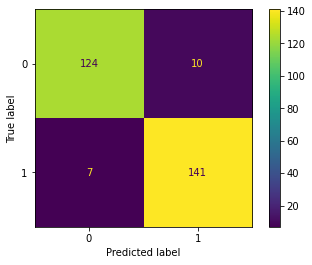

In [47]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(clf_svm, X_test, y_test)
plt.show() 

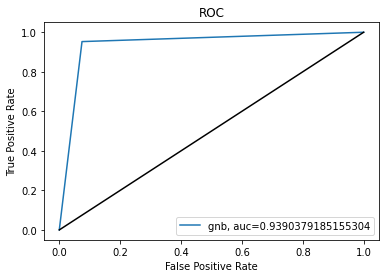

In [49]:
from sklearn import metrics
import matplotlib.pyplot as plt
fpr, tpr, _ = metrics.roc_curve(y_test,  svm_labels)
auc = metrics.roc_auc_score(y_test, svm_labels)
plt.plot(fpr ,tpr ,label="gnb, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')          
        

plt.legend(loc=4)
plt.show()

# DecisionTree


In [50]:
#tune parameters
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import tree
clf3 = tree.DecisionTreeClassifier()
clf_poly3 = GridSearchCV(clf3,param_grid={'criterion':['gini', 'entropy'],'splitter':['best', 'random']},return_train_score='False',cv=5)
clf_poly3.fit(X_train, y_train)
print('best parameters of the model are:',clf_poly3.best_params_)

best parameters of the model are: {'criterion': 'gini', 'splitter': 'best'}


In [68]:
# model for best parameters
dt_clf = tree.DecisionTreeClassifier(criterion='gini', splitter= 'best').fit(X_train,y_train)
dt_labels = dt_clf.predict(X_test)
print("Our accuracy is: %.2f%% " %(accuracy_score(y_test, dt_labels)*100))

Our accuracy is: 84.04% 


## KNN

### knn is best classifier due to accuracy

In [69]:
#tune parameters
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
classifier1 = KNeighborsClassifier() 
clf_poly3 = GridSearchCV(classifier1,param_grid={'n_neighbors':[1,2,3,4,5,6,7,8,9,10]},return_train_score='False',cv=5)
clf_poly3.fit(X_train, y_train)
print('best parameters of the model are:',clf_poly3.best_params_)

best parameters of the model are: {'n_neighbors': 1}


In [75]:
classifier = KNeighborsClassifier(n_neighbors=1).fit(X_train, y_train)
knn_labels = classifier.predict(X_test)
print("Our accuracy is: %.2f%% " %(accuracy_score(y_test, knn_labels)*100))

Our accuracy is: 94.33% 


### classification_report, confusion matrix for KNN

In [76]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix
print(classification_report(y_test,knn_labels))

              precision    recall  f1-score   support

           0       0.92      0.97      0.94       134
           1       0.97      0.92      0.94       148

    accuracy                           0.94       282
   macro avg       0.94      0.94      0.94       282
weighted avg       0.94      0.94      0.94       282



In [77]:
confusion_mtx2 = confusion_matrix(y_test,knn_labels )
confusion_mtx2

array([[130,   4],
       [ 12, 136]], dtype=int64)

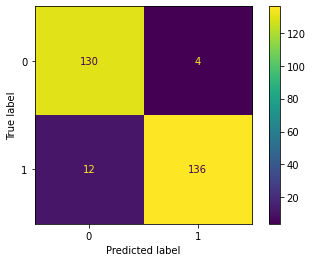

In [78]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(classifier, X_test, y_test)
plt.show() 

## MLP

In [79]:
# tune parameters
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
MLP1 = MLPClassifier(random_state=1, max_iter=300)
clf_poly5 = GridSearchCV(MLP1,param_grid={'activation':['identity', 'logistic', 'tanh', 'relu'],'solver':['lbfgs', 'sgd', 'adam'], 'hidden_layer_sizes':[(100,),(100,100),(100,100,100),(100,100,100,100),(100,100,100,100,100)]},return_train_score='False',cv=5)
clf_poly5.fit(X_train, y_train)
print('best parameters of the model are:',clf_poly5.best_params_)

best parameters of the model are: {'activation': 'relu', 'hidden_layer_sizes': (100,), 'solver': 'adam'}


In [80]:
MLP_clf = MLPClassifier(activation= 'relu', solver= 'adam', hidden_layer_sizes = (100,)).fit(X_train, y_train)
mlp_labels = MLP_clf.predict(X_test)
print("Our accuracy is: %.2f%% " %(accuracy_score(y_test, mlp_labels)*100))

Our accuracy is: 91.84% 


### classification_report, confusion matrix,ROC for MLP

In [81]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix
print(classification_report(y_test,mlp_labels))

              precision    recall  f1-score   support

           0       0.88      0.96      0.92       134
           1       0.96      0.89      0.92       148

    accuracy                           0.92       282
   macro avg       0.92      0.92      0.92       282
weighted avg       0.92      0.92      0.92       282



In [82]:
confusion_mlp = confusion_matrix(y_test,mlp_labels )
confusion_mlp

array([[128,   6],
       [ 17, 131]], dtype=int64)

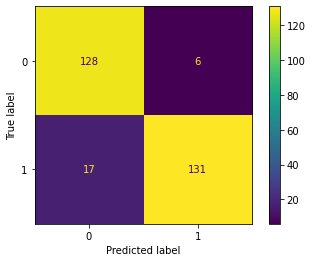

In [87]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(MLP_clf, X_test, y_test)
plt.show()

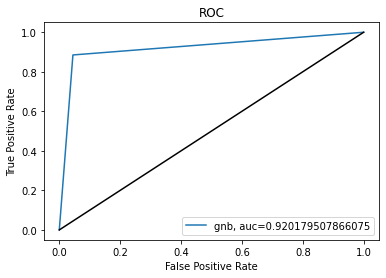

In [88]:
from sklearn import metrics
import matplotlib.pyplot as plt
fpr, tpr, _ = metrics.roc_curve(y_test,  mlp_labels)
auc = metrics.roc_auc_score(y_test, mlp_labels)
plt.plot(fpr ,tpr ,label="gnb, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')          
        

plt.legend(loc=4)
plt.show()

## RBF

In [89]:
# tune parameters
from sklearn.model_selection import GridSearchCV
from sklearn import svm
clf =svm.SVC(kernel='rbf')
clf_poly = GridSearchCV(clf,param_grid={'decision_function_shape':['ovo', 'ovr'], 'C':[1,5,10,20,25,30], 'gamma':['scale', 'auto']},return_train_score='False',cv = 5)
clf_poly.fit(X_train, y_train)
print('best parameters of the model are:',clf_poly.best_params_)

best parameters of the model are: {'C': 5, 'decision_function_shape': 'ovo', 'gamma': 'scale'}


In [91]:
clf_svm_rbf = svm.SVC(kernel='rbf', C=5, gamma='scale',decision_function_shape= 'ovo').fit(X_train, y_train)
svm_rbf_labels = clf_svm_rbf.predict(X_test)
print("Our accuracy is: %.2f%% " %(accuracy_score(y_test, svm_rbf_labels)*100))

Our accuracy is: 93.26% 


In [92]:
from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix
print(classification_report(y_test,svm_rbf_labels))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       134
           1       0.95      0.92      0.93       148

    accuracy                           0.93       282
   macro avg       0.93      0.93      0.93       282
weighted avg       0.93      0.93      0.93       282



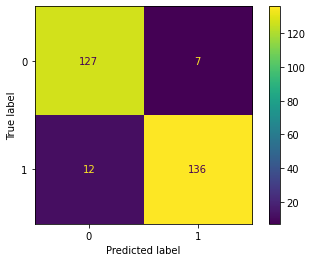

In [93]:
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
plot_confusion_matrix(clf_svm_rbf, X_test, y_test)
plt.show()

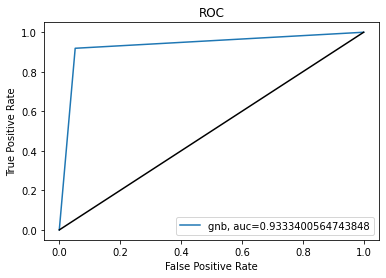

In [94]:
from sklearn import metrics
import matplotlib.pyplot as plt
fpr, tpr, _ = metrics.roc_curve(y_test,  svm_rbf_labels)
auc = metrics.roc_auc_score(y_test, svm_rbf_labels)
plt.plot(fpr ,tpr ,label="gnb, auc="+str(auc))
plt.plot([0, 1], [0, 1], color='black')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')          
        

plt.legend(loc=4)
plt.show()

# Ensemble learning with Bagging classifier

## first we apply ensemble learning on decision tree classifier
### we got an accuracy of 80 percent with decision tree on our data

In [96]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier

tree = DecisionTreeClassifier(criterion='gini', splitter= 'best')
bag = BaggingClassifier(tree, n_estimators=100, max_samples=0.8,
                        random_state=1)



In [65]:
from sklearn.model_selection import cross_val_score
bagging_scores = cross_val_score(bag, final_X, y_sm, cv=5)

In [66]:
bagging_scores

array([0.82300885, 0.92035398, 0.92920354, 0.85777778, 0.87111111])

In [67]:
print("Our accuracy is: %.2f%% +- %.2f%%" %(np.mean(bagging_scores)*100,np.std(bagging_scores)*100))

Our accuracy is: 88.03% +- 3.97%


### we can see that we have 8 percent improvement in average!

## and next we apply ensemble learning on knn which was our best classifier with accuracy of 94.33 percent

### in first step we use Grid search for parameter tuning with cross validation

In [97]:
# tune parameters
from sklearn.model_selection import GridSearchCV
from sklearn import svm
classifier = KNeighborsClassifier(n_neighbors=1)
bag2 = BaggingClassifier(classifier ,bootstrap_features = True)
clf_poly = GridSearchCV(bag2,param_grid={'n_estimators':[10,25,50,75,100],'max_samples':[0.5,0.7,0.8,0.9,1.0], 'max_features':[0.5,0.7,0.8,0.9,1.0]},return_train_score='False',cv = 5)
clf_poly.fit(X_train, y_train)
print('best parameters of the model are:',clf_poly.best_params_)

best parameters of the model are: {'max_features': 0.5, 'max_samples': 1.0, 'n_estimators': 75}


In [101]:
from sklearn.ensemble import BaggingClassifier
clf1 = svm.SVC(kernel='poly',  C=10, decision_function_shape ='ovo', degree=3)
final_bag = BaggingClassifier(classifier, n_estimators=75,max_samples = 1.0 , max_features =0.5 ,bootstrap_features = True).fit(X_train,y_train)


In [102]:
bagging_labels = final_bag.predict(X_test)

In [103]:

print("Our accuracy is: %.2f%% " %(accuracy_score(y_test, bagging_labels)*100))

Our accuracy is: 96.10% 


## average accuracy for ensemble learning is 2 percent higher than knn without ensemble learning